# Fraud Transaction Detection
----


## 1. Loading the Dataset

In [1]:
import os 
import pandas as pd 

data_folder = '/Users/rithul.v/Desktop/Projects/fraud_detection/data'
dataframe = []

for filename in os.listdir(data_folder):
    if filename.endswith(".pkl"):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_pickle(file_path)
        dataframe.append(df)

combined_df = pd.concat(dataframe,ignore_index=True)

In [2]:
combined_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,316917,2018-05-04 00:02:25,2924,1711,85.38,2851345,33,0,0
1,316918,2018-05-04 00:02:52,3808,6385,81.08,2851372,33,0,0
2,316919,2018-05-04 00:04:24,2657,9031,38.65,2851464,33,0,0
3,316920,2018-05-04 00:04:26,2457,3594,120.89,2851466,33,0,0
4,316921,2018-05-04 00:05:29,2686,8434,32.54,2851529,33,0,0
...,...,...,...,...,...,...,...,...,...
1754150,374287,2018-05-09 23:57:42,2806,2983,50.86,3369462,38,0,0
1754151,374288,2018-05-09 23:58:26,4465,9446,20.17,3369506,38,0,0
1754152,374289,2018-05-09 23:58:33,4754,3905,96.63,3369513,38,0,0
1754153,374290,2018-05-09 23:58:40,4365,7192,20.39,3369520,38,0,0


## 2. Understand the Dataset

In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB


Lets keep only the main column that is mentioned on the Fraud Transaction Detection.pdf file.

**Description of main columns:**

● TRANSACTION_ID: A unique identifier for the transaction

● TX_DATETIME: Date and time at which the transaction occurs

● CUSTOMER_ID: The identifier for the customer. Each customer has a unique identifier

● TERMINAL_ID: The identifier for the merchant (or more precisely the terminal). Each
terminal has a unique identifier

● TX_AMOUNT: The amount of the transaction.

● TX_FRAUD: A binary variable, with the value 0 for a legitimate transaction, 1 for a
fraudulent transaction.

In [4]:
data = combined_df[['TRANSACTION_ID','TX_DATETIME','CUSTOMER_ID','TERMINAL_ID','TX_AMOUNT','TX_FRAUD']]
data

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,316917,2018-05-04 00:02:25,2924,1711,85.38,0
1,316918,2018-05-04 00:02:52,3808,6385,81.08,0
2,316919,2018-05-04 00:04:24,2657,9031,38.65,0
3,316920,2018-05-04 00:04:26,2457,3594,120.89,0
4,316921,2018-05-04 00:05:29,2686,8434,32.54,0
...,...,...,...,...,...,...
1754150,374287,2018-05-09 23:57:42,2806,2983,50.86,0
1754151,374288,2018-05-09 23:58:26,4465,9446,20.17,0
1754152,374289,2018-05-09 23:58:33,4754,3905,96.63,0
1754153,374290,2018-05-09 23:58:40,4365,7192,20.39,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   TRANSACTION_ID  int64         
 1   TX_DATETIME     datetime64[ns]
 2   CUSTOMER_ID     object        
 3   TERMINAL_ID     object        
 4   TX_AMOUNT       float64       
 5   TX_FRAUD        int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 80.3+ MB


In [6]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
TRANSACTION_ID,1754155.0,877077.0,0.0,438538.5,877077.0,1315615.5,1754154.0,506381.075063
TX_DATETIME,1754155,2018-07-01 11:20:33.708572416,2018-04-01 00:00:31,2018-05-16 14:40:46.500000,2018-07-01 11:11:10,2018-08-16 08:01:01.500000,2018-09-30 23:59:57,NaN
TX_AMOUNT,1754155.0,53.632302,0.0,21.01,44.64,76.95,2628.0,42.326492
TX_FRAUD,1754155.0,0.008369,0.0,0.0,0.0,0.0,1.0,0.0911


In [7]:
data.describe(include='O').T

,count,unique,top,freq
CUSTOMER_ID,1754155,4990,382,767
TERMINAL_ID,1754155,10000,4018,376


In [8]:
data.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,316917,2018-05-04 00:02:25,2924,1711,85.38,0
1,316918,2018-05-04 00:02:52,3808,6385,81.08,0
2,316919,2018-05-04 00:04:24,2657,9031,38.65,0
3,316920,2018-05-04 00:04:26,2457,3594,120.89,0
4,316921,2018-05-04 00:05:29,2686,8434,32.54,0


In [9]:
data.tail()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
1754150,374287,2018-05-09 23:57:42,2806,2983,50.86,0
1754151,374288,2018-05-09 23:58:26,4465,9446,20.17,0
1754152,374289,2018-05-09 23:58:33,4754,3905,96.63,0
1754153,374290,2018-05-09 23:58:40,4365,7192,20.39,0
1754154,374291,2018-05-09 23:59:09,3079,2647,67.70,0


In [10]:
data.sample(10)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
897759,744045,2018-06-17 13:00:25,1323,2459,118.23,0
521497,243672,2018-04-26 10:33:55,4085,672,200.68,0
530641,799239,2018-06-23 09:50:27,2057,6419,11.69,0
1382851,463479,2018-05-19 08:46:35,2578,2964,71.29,0
222594,338096,2018-05-06 08:02:36,3506,6397,73.44,0
517676,259013,2018-04-27 23:04:29,3611,2169,51.90,0
313450,984672,2018-07-12 14:14:09,3529,7991,59.63,0
1728356,1038668,2018-07-18 09:22:47,4126,7893,67.87,0
1391320,1056204,2018-07-20 06:23:07,2133,187,68.47,0
358534,560044,2018-05-29 09:51:01,4284,7923,6.80,0


In [11]:
data.isnull().sum()

TRANSACTION_ID    0
TX_DATETIME       0
CUSTOMER_ID       0
TERMINAL_ID       0
TX_AMOUNT         0
TX_FRAUD          0
dtype: int64

**There is no null values present in this dataset.**

In [12]:
data.duplicated().sum()

0

**There is no duplicated data present in this dataset.**

## 3. Univariate Analysis

In [13]:
## Importing the necessary libraries for EDA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

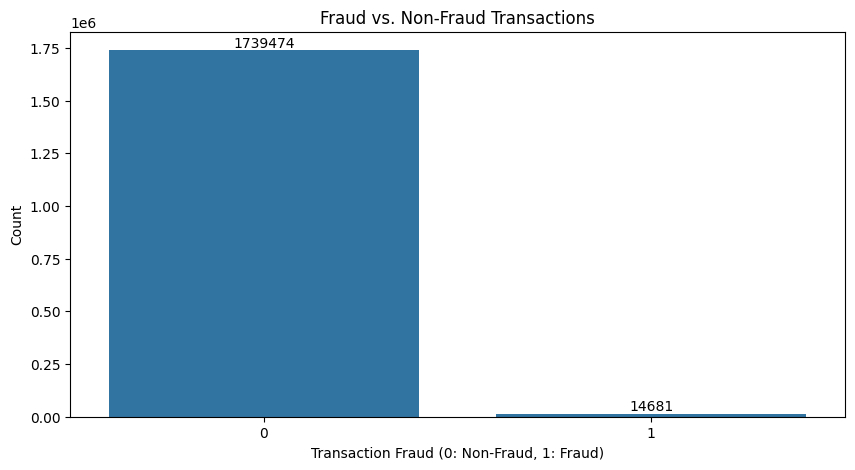

In [14]:
plt.figure(figsize=(10, 5))
fraud = sns.countplot(x=data['TX_FRAUD'])  
fraud.set_title('Fraud vs. Non-Fraud Transactions')


for bars in fraud.containers:
    fraud.bar_label(bars, fmt='%d')  

plt.xlabel('Transaction Fraud (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

**Summary:**
The dataset is highly imbalanced, with non-fraudulent transactions (~1.74 million) vastly outnumbering fraudulent ones (~14.6k). This can severely impact the performance of the Neural Network, as it might learn to always predict non-fraudulent transactions.

**Plan of Action:**
- Create new features that capture fraud patterns based on your rules.
- Use class weighting or focal loss instead of SMOTE.
- Train a model on the dataset while handling class imbalance properly.
- Use precision, recall, F1-score, and confusion matrix to check performance.

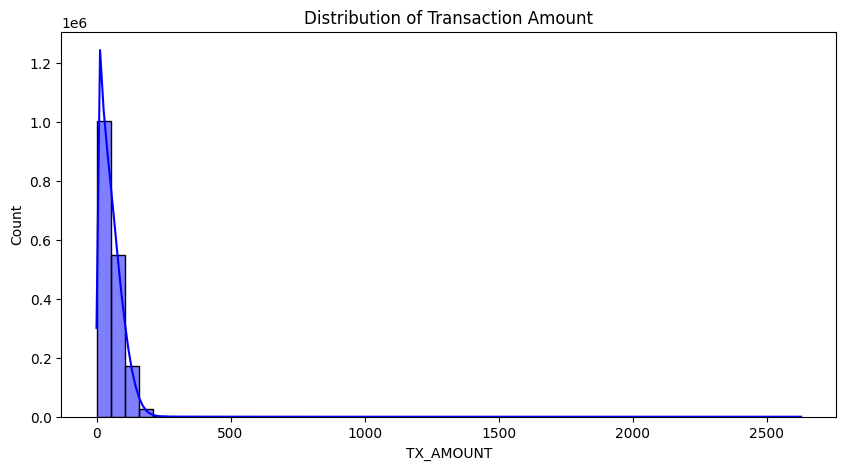

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data['TX_AMOUNT'], kde=True, color='blue',bins=50)
plt.title('Distribution of Transaction Amount')
plt.show()

**Summary:**
- In fraud detection, high transaction amounts are critical fraud indicators, so do not remove them as outliers. Instead, leverage them as key features.
- Keep `TX_AMOUNT` as it is without transformation because its a direct fraud indicator.

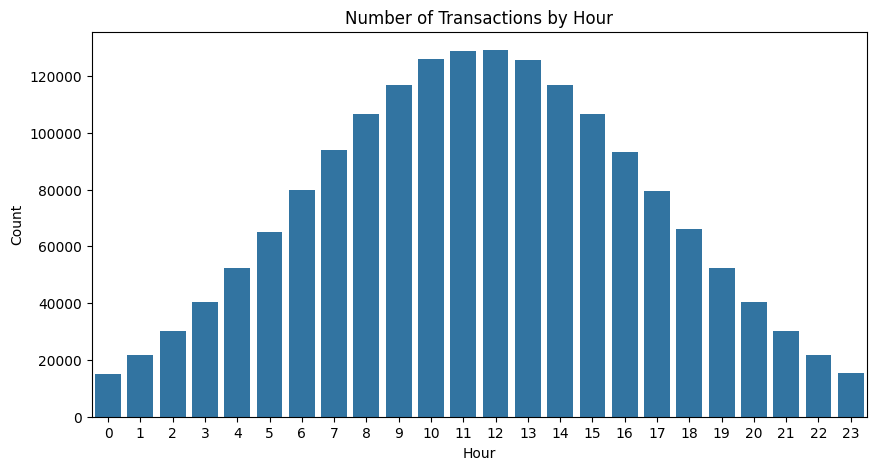

In [16]:
plt.figure(figsize=(10, 5))
tx_hour_counts = data['TX_DATETIME'].dt.hour.value_counts().sort_index()  
sns.barplot(x=tx_hour_counts.index, y=tx_hour_counts.values)  
plt.title('Number of Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(range(24))  
plt.show()


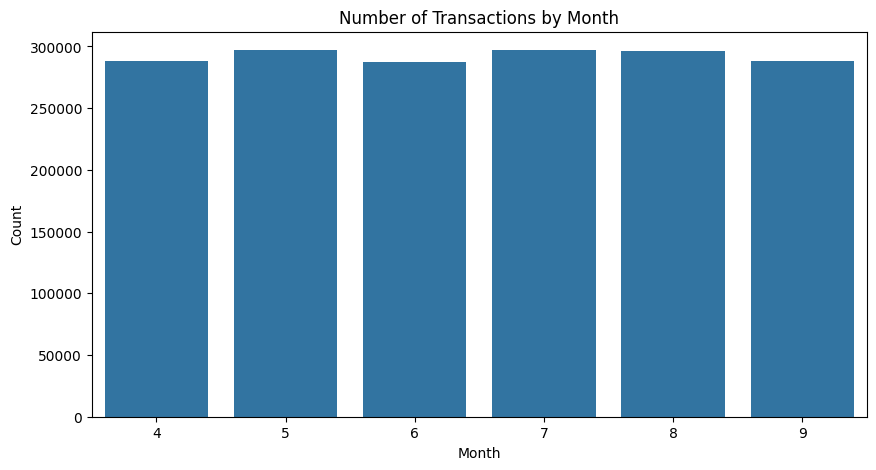

In [17]:
plt.figure(figsize=(10, 5))
tx_month_counts = data['TX_DATETIME'].dt.month.value_counts().sort_index()
sns.barplot(x=tx_month_counts.index, y=tx_month_counts.values)
plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


Text(0, 0.5, 'Count')

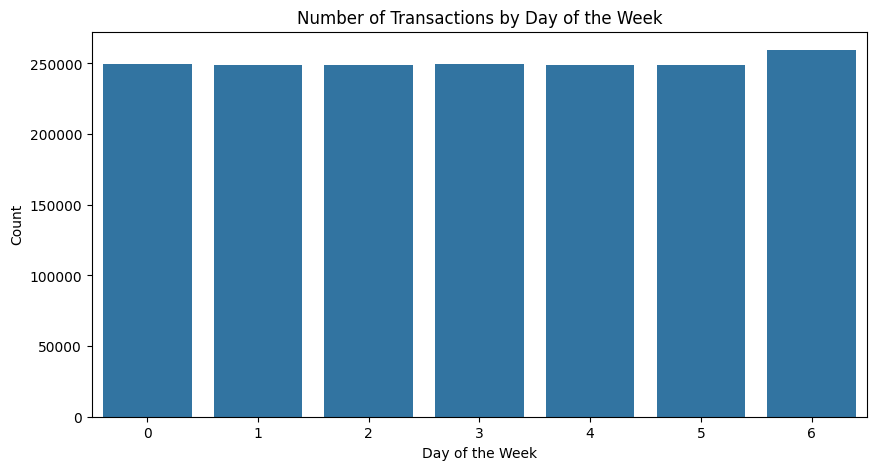

In [18]:
tx_day_counts = data['TX_DATETIME'].dt.dayofweek.value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=tx_day_counts.index, y=tx_day_counts.values)
plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count') 

## 4. Bivariate Analysis

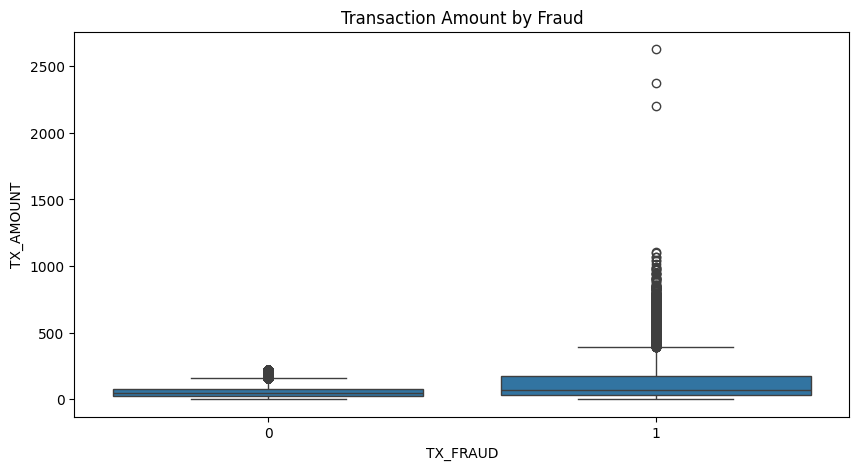

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='TX_FRAUD', y='TX_AMOUNT', data=data)
plt.title('Transaction Amount by Fraud')
plt.show()

**Summary:**
- Most fraud transactions (TX_FRAUD=1) have higher median and outliers beyond 220. This aligns with your first fraud rule: `TX_AMOUNT > 220` is fraud.

- The majority of `TX_FRAUD=0` transactions are in a much lower range, confirming fraudsters tend to make high-value transactions.


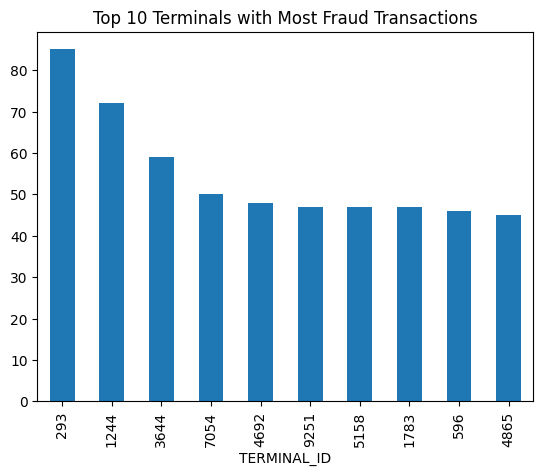

In [20]:
fraud_by_terminal = data[data["TX_FRAUD"] == 1]["TERMINAL_ID"].value_counts().head(10)
fraud_by_terminal.plot(kind="bar", title="Top 10 Terminals with Most Fraud Transactions")
plt.show()

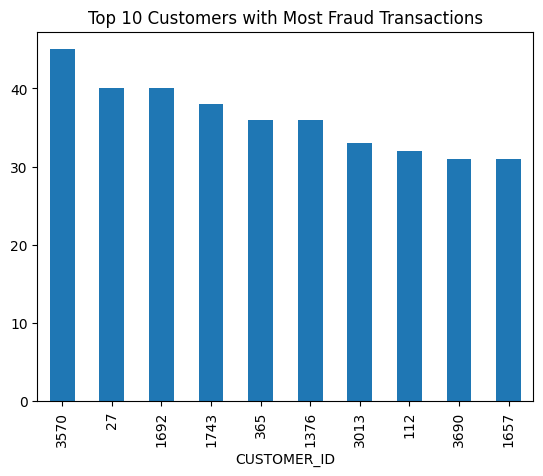

In [21]:
fraud_by_customer = data[data["TX_FRAUD"] == 1]["CUSTOMER_ID"].value_counts().head(10)
fraud_by_customer.plot(kind="bar", title="Top 10 Customers with Most Fraud Transactions")
plt.show()

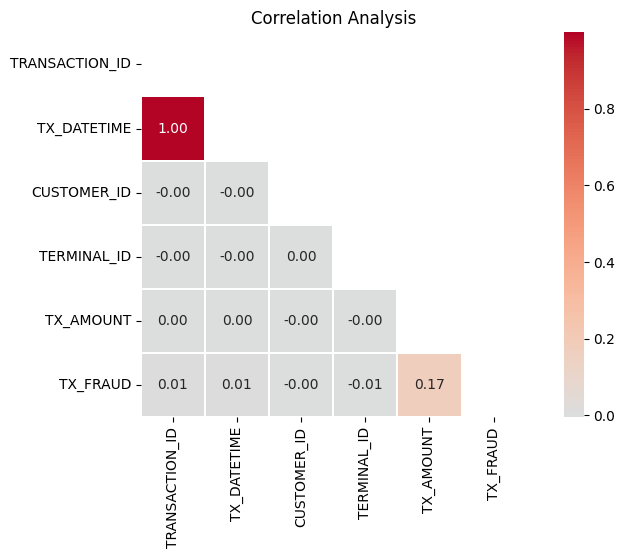

In [22]:
plt.figure(figsize=(10, 5))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', linewidths=0.2, cmap='coolwarm', center=0, cbar=True, square=True)
plt.title('Correlation Analysis')
plt.show()

**Summary:**
- `TX_AMOUNT` has the highest correlation with `TX_FRAUD` (0.17).
-  `TX_DATETIME` has no meaningful correlation with `TX_FRAUD`.
- Other IDs (`CUSTOMER_ID`, `TERMINAL_ID`) show near-zero correlation.

## 5. Feature Engineering for Rule Based Fraud Detection

In [23]:
## First rule of Fraud Transaction
data['High_Value_Txn'] = (data['TX_AMOUNT'] > 220).astype(int)
data.sample(10)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,High_Value_Txn
777461,1352124,2018-08-20 03:36:58,2132,8130,1.60,0,0
124938,403808,2018-05-13 04:18:17,4314,2464,39.26,0,0
873806,1218307,2018-08-06 04:41:57,1975,7366,5.61,0,0
974159,1289955,2018-08-13 12:40:13,1564,3566,69.63,0,0
2627,319544,2018-05-04 08:45:09,1068,4203,127.09,0,0
1167392,265915,2018-04-28 15:03:15,977,9355,33.87,1,0
834344,1380180,2018-08-22 21:35:21,4663,6701,11.13,0,0
353178,449165,2018-05-17 16:19:24,2931,322,0.73,0,0
402573,1475486,2018-09-01 21:35:11,3626,5573,52.90,0,0
278743,988316,2018-07-13 03:22:50,4391,4407,43.25,0,0


In [24]:
## Second Rule of Fraud Transaction

data["TX_DATETIME"] = pd.to_datetime(data["TX_DATETIME"])


In [25]:
data["terminal_first_fraud_date"] = data.loc[data["TX_FRAUD"] == 1].groupby("TERMINAL_ID")["TX_DATETIME"].transform("min")

In [26]:
data["days_since_terminal_fraud"] = (data["TX_DATETIME"] - data["terminal_first_fraud_date"]).dt.days

In [27]:
data["terminal_in_fraud_period"] = (data["days_since_terminal_fraud"] >= 0) & (data["days_since_terminal_fraud"] <= 28)


In [28]:

data["terminal_fraud_28d"] = data.groupby("TERMINAL_ID")["terminal_in_fraud_period"].transform("sum")


data["terminal_txn_28d"] = data.groupby("TERMINAL_ID")["TX_AMOUNT"].transform("count")


data["terminal_fraud_ratio_28d"] = data["terminal_fraud_28d"] / data["terminal_txn_28d"]


In [29]:
## Third Rule of Fraud Transaction
data["customer_first_fraud_date"] = data.loc[data["TX_FRAUD"] == 1].groupby("CUSTOMER_ID")["TX_DATETIME"].transform("min")

data["days_since_customer_fraud"] = (data["TX_DATETIME"] - data["customer_first_fraud_date"]).dt.days

data["customer_in_fraud_period"] = (data["days_since_customer_fraud"] >= 0) & (data["days_since_customer_fraud"] <= 14)

def avg_spend_before_fraud(group):
    first_fraud_date = group["customer_first_fraud_date"].iloc[0]
    return group.loc[group["TX_DATETIME"] < first_fraud_date, "TX_AMOUNT"].mean()

data["customer_avg_spend_before_fraud"] = data.groupby("CUSTOMER_ID").apply(avg_spend_before_fraud).reset_index(level=0, drop=True)

data["customer_spike_ratio"] = data["TX_AMOUNT"] / data["customer_avg_spend_before_fraud"]

data["customer_high_txn_14d"] = (
    data.groupby("CUSTOMER_ID")["TX_AMOUNT"]
    .apply(lambda x: x.rolling(14, min_periods=1).apply(lambda y: (y > (5 * y.mean())).sum()))
    .reset_index(level=0, drop=True)
)

data["customer_fraud_14d"] = data.groupby("CUSTOMER_ID")["customer_in_fraud_period"].transform("sum")
data["customer_txn_14d"] = data.groupby("CUSTOMER_ID")["TX_AMOUNT"].transform("count")
data["customer_fraud_ratio_14d"] = data["customer_fraud_14d"] / data["customer_txn_14d"]

In [30]:
data

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,High_Value_Txn,terminal_first_fraud_date,days_since_terminal_fraud,terminal_in_fraud_period,...,terminal_fraud_ratio_28d,customer_first_fraud_date,days_since_customer_fraud,customer_in_fraud_period,customer_avg_spend_before_fraud,customer_spike_ratio,customer_high_txn_14d,customer_fraud_14d,customer_txn_14d,customer_fraud_ratio_14d
0,316917,2018-05-04 00:02:25,2924,1711,85.38,0,0,NaT,NaN,False,...,0.000000,NaT,NaN,False,NaN,NaN,0.0,0,444,0.000000
1,316918,2018-05-04 00:02:52,3808,6385,81.08,0,0,NaT,NaN,False,...,0.005525,NaT,NaN,False,NaN,NaN,0.0,19,674,0.028190
2,316919,2018-05-04 00:04:24,2657,9031,38.65,0,0,NaT,NaN,False,...,0.006289,NaT,NaN,False,NaN,NaN,0.0,1,648,0.001543
3,316920,2018-05-04 00:04:26,2457,3594,120.89,0,0,NaT,NaN,False,...,0.000000,NaT,NaN,False,NaN,NaN,0.0,1,630,0.001587
4,316921,2018-05-04 00:05:29,2686,8434,32.54,0,0,NaT,NaN,False,...,0.000000,NaT,NaN,False,NaN,NaN,0.0,2,170,0.011765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754150,374287,2018-05-09 23:57:42,2806,2983,50.86,0,0,NaT,NaN,False,...,0.000000,NaT,NaN,False,NaN,NaN,0.0,2,643,0.003110
1754151,374288,2018-05-09 23:58:26,4465,9446,20.17,0,0,NaT,NaN,False,...,0.005348,NaT,NaN,False,NaN,NaN,0.0,1,702,0.001425
1754152,374289,2018-05-09 23:58:33,4754,3905,96.63,0,0,NaT,NaN,False,...,0.014925,NaT,NaN,False,NaN,NaN,0.0,1,636,0.001572
1754153,374290,2018-05-09 23:58:40,4365,7192,20.39,0,0,NaT,NaN,False,...,0.010582,NaT,NaN,False,NaN,NaN,0.0,1,336,0.002976


In [31]:
pd.options.display.max_columns = None
data

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,High_Value_Txn,terminal_first_fraud_date,days_since_terminal_fraud,terminal_in_fraud_period,terminal_fraud_28d,terminal_txn_28d,terminal_fraud_ratio_28d,customer_first_fraud_date,days_since_customer_fraud,customer_in_fraud_period,customer_avg_spend_before_fraud,customer_spike_ratio,customer_high_txn_14d,customer_fraud_14d,customer_txn_14d,customer_fraud_ratio_14d
0,316917,2018-05-04 00:02:25,2924,1711,85.38,0,0,NaT,NaN,False,0,129,0.000000,NaT,NaN,False,NaN,NaN,0.0,0,444,0.000000
1,316918,2018-05-04 00:02:52,3808,6385,81.08,0,0,NaT,NaN,False,1,181,0.005525,NaT,NaN,False,NaN,NaN,0.0,19,674,0.028190
2,316919,2018-05-04 00:04:24,2657,9031,38.65,0,0,NaT,NaN,False,1,159,0.006289,NaT,NaN,False,NaN,NaN,0.0,1,648,0.001543
3,316920,2018-05-04 00:04:26,2457,3594,120.89,0,0,NaT,NaN,False,0,169,0.000000,NaT,NaN,False,NaN,NaN,0.0,1,630,0.001587
4,316921,2018-05-04 00:05:29,2686,8434,32.54,0,0,NaT,NaN,False,0,170,0.000000,NaT,NaN,False,NaN,NaN,0.0,2,170,0.011765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754150,374287,2018-05-09 23:57:42,2806,2983,50.86,0,0,NaT,NaN,False,0,228,0.000000,NaT,NaN,False,NaN,NaN,0.0,2,643,0.003110
1754151,374288,2018-05-09 23:58:26,4465,9446,20.17,0,0,NaT,NaN,False,1,187,0.005348,NaT,NaN,False,NaN,NaN,0.0,1,702,0.001425
1754152,374289,2018-05-09 23:58:33,4754,3905,96.63,0,0,NaT,NaN,False,3,201,0.014925,NaT,NaN,False,NaN,NaN,0.0,1,636,0.001572
1754153,374290,2018-05-09 23:58:40,4365,7192,20.39,0,0,NaT,NaN,False,2,189,0.010582,NaT,NaN,False,NaN,NaN,0.0,1,336,0.002976


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 22 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   TRANSACTION_ID                   int64         
 1   TX_DATETIME                      datetime64[ns]
 2   CUSTOMER_ID                      object        
 3   TERMINAL_ID                      object        
 4   TX_AMOUNT                        float64       
 5   TX_FRAUD                         int64         
 6   High_Value_Txn                   int64         
 7   terminal_first_fraud_date        datetime64[ns]
 8   days_since_terminal_fraud        float64       
 9   terminal_in_fraud_period         bool          
 10  terminal_fraud_28d               int64         
 11  terminal_txn_28d                 int64         
 12  terminal_fraud_ratio_28d         float64       
 13  customer_first_fraud_date        datetime64[ns]
 14  days_since_customer_fraud        f

In [33]:
data=data[['customer_high_txn_14d','High_Value_Txn','TX_AMOUNT','TX_FRAUD','terminal_in_fraud_period','terminal_fraud_ratio_28d','customer_in_fraud_period','customer_spike_ratio','customer_fraud_ratio_14d']]

In [34]:
data["customer_spike_ratio"] = data["customer_spike_ratio"].fillna(1)

In [35]:
data

,customer_high_txn_14d,High_Value_Txn,TX_AMOUNT,TX_FRAUD,terminal_in_fraud_period,terminal_fraud_ratio_28d,customer_in_fraud_period,customer_spike_ratio,customer_fraud_ratio_14d
0,0.0,0,85.38,0,False,0.000000,False,1.0,0.000000
1,0.0,0,81.08,0,False,0.005525,False,1.0,0.028190
2,0.0,0,38.65,0,False,0.006289,False,1.0,0.001543
3,0.0,0,120.89,0,False,0.000000,False,1.0,0.001587
4,0.0,0,32.54,0,False,0.000000,False,1.0,0.011765
...,...,...,...,...,...,...,...,...,...
1754150,0.0,0,50.86,0,False,0.000000,False,1.0,0.003110
1754151,0.0,0,20.17,0,False,0.005348,False,1.0,0.001425
1754152,0.0,0,96.63,0,False,0.014925,False,1.0,0.001572
1754153,0.0,0,20.39,0,False,0.010582,False,1.0,0.002976


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   customer_high_txn_14d     float64
 1   High_Value_Txn            int64  
 2   TX_AMOUNT                 float64
 3   TX_FRAUD                  int64  
 4   terminal_in_fraud_period  bool   
 5   terminal_fraud_ratio_28d  float64
 6   customer_in_fraud_period  bool   
 7   customer_spike_ratio      float64
 8   customer_fraud_ratio_14d  float64
dtypes: bool(2), float64(5), int64(2)
memory usage: 97.0 MB


## 6. Feature Importance

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
x = data.drop("TX_FRAUD", axis=1)
y = data["TX_FRAUD"]

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(x, y)

importances = rf.feature_importances_
feature_names = x.columns

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


In [39]:
feature_importance_df

,Feature,Importance
3,terminal_in_fraud_period,0.384498
4,terminal_fraud_ratio_28d,0.240408
5,customer_in_fraud_period,0.158953
2,TX_AMOUNT,0.104797
7,customer_fraud_ratio_14d,0.074328
1,High_Value_Txn,0.034885
0,customer_high_txn_14d,0.002125
6,customer_spike_ratio,0.000006


In [42]:
data

,customer_high_txn_14d,High_Value_Txn,TX_AMOUNT,TX_FRAUD,terminal_in_fraud_period,terminal_fraud_ratio_28d,customer_in_fraud_period,customer_spike_ratio,customer_fraud_ratio_14d
0,0.0,0,85.38,0,False,0.000000,False,1.0,0.000000
1,0.0,0,81.08,0,False,0.005525,False,1.0,0.028190
2,0.0,0,38.65,0,False,0.006289,False,1.0,0.001543
3,0.0,0,120.89,0,False,0.000000,False,1.0,0.001587
4,0.0,0,32.54,0,False,0.000000,False,1.0,0.011765
...,...,...,...,...,...,...,...,...,...
1754150,0.0,0,50.86,0,False,0.000000,False,1.0,0.003110
1754151,0.0,0,20.17,0,False,0.005348,False,1.0,0.001425
1754152,0.0,0,96.63,0,False,0.014925,False,1.0,0.001572
1754153,0.0,0,20.39,0,False,0.010582,False,1.0,0.002976


In [43]:
data.drop(['customer_high_txn_14d','customer_spike_ratio'],axis=1,inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 7 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   High_Value_Txn            int64  
 1   TX_AMOUNT                 float64
 2   TX_FRAUD                  int64  
 3   terminal_in_fraud_period  bool   
 4   terminal_fraud_ratio_28d  float64
 5   customer_in_fraud_period  bool   
 6   customer_fraud_ratio_14d  float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 70.3 MB


## 7. Model Training and Evaluation

In [45]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [46]:
x = data.drop('TX_FRAUD', axis=1)
y = data['TX_FRAUD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [48]:
# 1. Random Forest Model
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
# 2. XGBoost Model
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),eval_metric="auc", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [50]:
# 3. LightGBM Model
lgb_model = lgb.LGBMClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 10277, number of negative: 1217631
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 1227908, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008370 -> initscore=-4.774754
[LightGBM] [Info] Start training from score -4.774754


LGBMClassifier(random_state=42, scale_pos_weight=118.48117154811716)

In [51]:
# 4. CatBoost Model
cb_model = cb.CatBoostClassifier(auto_class_weights="Balanced", random_state=42, verbose=0)
cb_model.fit(x_train, y_train)

In [52]:
models = {
    "Random Forest": rf,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "CatBoost": cb_model
}

for name, model in models.items():
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    print(f"🔹 Model: {name}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"PR AUC Score: {pr_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


🔹 Model: Random Forest
ROC AUC Score: 0.9695
PR AUC Score: 0.9352
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    521843
           1       1.00      0.90      0.95      4404

    accuracy                           1.00    526247
   macro avg       1.00      0.95      0.97    526247
weighted avg       1.00      1.00      1.00    526247

--------------------------------------------------
🔹 Model: XGBoost
ROC AUC Score: 0.9945
PR AUC Score: 0.9305
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    521843
           1       0.39      0.93      0.55      4404

    accuracy                           0.99    526247
   macro avg       0.70      0.96      0.77    526247
weighted avg       0.99      0.99      0.99    526247

--------------------------------------------------
🔹 Model: LightGBM
ROC AUC Score: 0.9933
PR AUC Score: 0.9279
              precision    recall  f1-score   support

  

## Conclusion:
📌 **Best Choice: CatBoost**  

- It has a strong balance of **precision (0.56) and recall (0.92)** on fraud cases.  
- It achieves the highest **PR AUC (0.9325)**, which is key for imbalanced datasets like fraud detection.  
- A well-rounded model for minimizing **false negatives** while maintaining **high precision**.  

🔹 **Alternative:**  
If looking for **maximum recall (fraud detection at any cost)**, **XGBoost** is a solid alternative.
